In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [37]:
from matplotlib.ticker import LinearLocator

In [38]:
from matplotlib import cm

In [4]:
import functions as fct

# Importation des données

In [5]:
data = pd.read_csv("data1.txt")

In [6]:
data = data.rename(columns={"6.1101":"X","17.592":"y"});

In [42]:
X = data["X"].to_numpy()

In [8]:
y = data["y"].to_numpy()

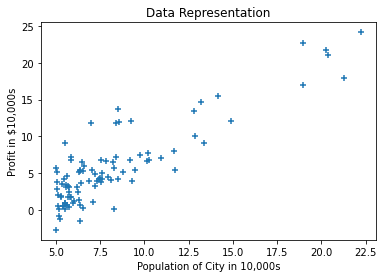

In [32]:
figure = plt.figure
plt.scatter(X,y,marker="+")
plt.title("Data Representation")
plt.xlabel("Population of City in 10,000s");
plt.ylabel("Profit in $10,000s");

# Définition des Paramètres

In [12]:
theta=np.array([0,0])

In [14]:
alpha = 0.01

In [15]:
n_iter = 10

# Représentation du coût

In [52]:
m = X.shape[0]
X_transformed = np.array([[1,round(X[i],4)] for i in range(m)])

In [71]:
theta0_range = np.linspace(-10,10,100)

In [72]:
theta1_range = np.linspace(-1,4,100)

In [73]:
cost_computed = np.zeros((theta0_range.shape[0],theta1_range.shape[0]))
for i in range(theta0_range.shape[0]):
    for j in range(theta1_range.shape[0]):
        theta=[theta0_range[i],theta1_range[j]]
        cost_computed[i,j]=fct.cost(X_transformed,y,theta)

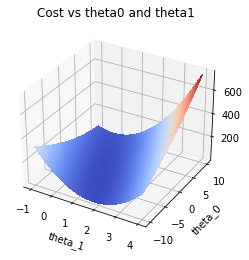

In [80]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
theta1_range_msh, theta0_range_msh = np.meshgrid(theta1_range, theta0_range)
Z = cost_computed

# Plot the surface.
surf = ax.plot_surface(theta1_range_msh, theta0_range_msh, cost_computed, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('Cost vs theta0 and theta1')
plt.xlabel('theta_1');
plt.ylabel('theta_0');

# Gradient descendant 

In [16]:
theta_predict = fct.gradient_descent(X_transformed, y, theta, alpha, n_iter)[0]

In [17]:
y_predict = np.dot(X_transformed, theta_predict)

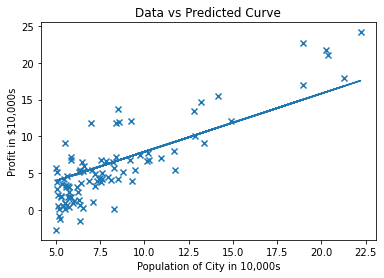

In [31]:
figure = plt.figure
plt.plot(X,y_predict)
plt.scatter(X,y,marker="x")
plt.title("Data vs Predicted Curve")
plt.xlabel("Population of City in 10,000s");
plt.ylabel("Profit in $10,000s");

# Calcul du coût

In [19]:
cost_values = fct.gradient_descent(X_transformed, y, theta, alpha, n_iter)[1]

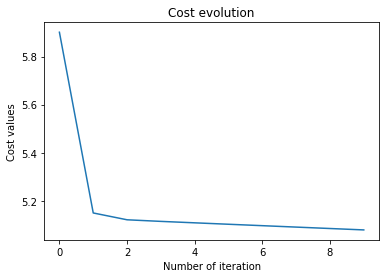

In [33]:
figure = plt.figure
plt.plot(range(n_iter),cost_values)
plt.title("Cost evolution");
plt.xlabel("Number of iteration");
plt.ylabel("Cost values");